# Importing modules

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')



from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Load dataset

In [2]:
df1 = pd.read_csv('/content/dataset.csv')

In [3]:
df1.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


In [4]:
df1.shape

(3376, 2)

In [5]:
df1.describe()

,product_review,product_category
count,3376,3376
unique,3373,5
top,"Lightweight, soft cotton top and shorts. i thi...",Bottoms
freq,2,685


In [6]:
df1.product_category.value_counts()

,count
product_category,
Bottoms,685
Dresses,681
Tops,680
Jackets,680
Intimate,650


# Cleaning and preprocessing reviews

In [7]:
#converting all reviews to lower cas
review = df1.product_review[0]
review.lower()

"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [8]:
df1.product_review = df1.product_review.str.lower()

In [9]:
df1.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


In [10]:
#removing punctuations
df1.product_review[0].translate(str.maketrans('','',string.punctuation))

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [11]:
df1.product_review = df1.product_review.str.translate(str.maketrans('','',string.punctuation))

In [12]:
df1.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


# Tokenize the reviews and remove stopwords

In [13]:
token = nltk.word_tokenize("hello i am rohan")

In [14]:

stop = stopwords.words("english")


In [15]:
[t for t in token if t not in stop]

['hello', 'rohan']

In [16]:
#tokenizing all the reviews
df1["tokenized_review"] = df1.product_review.apply(nltk.word_tokenize)

In [17]:
df1.head()

,product_review,product_category,tokenized_review
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."


In [18]:
#removing stopwords from tokenized review

def remove_stopwords(token):
  return[t for t in token if t not in stop]

df1.tokenized_review.apply(remove_stopwords)

,tokenized_review
0,"[love, love, love, jumpsuit, fun, flirty, fabu..."
1,"[beautifully, made, pants, trend, flared, crop..."
2,"[never, would, given, pants, second, look, onl..."
3,"[pants, even, better, person, downside, need, ..."
4,"[silhouette, length, skirt, length, flattering..."
...,...
3371,"[nice, everyday, jacket, wear, dresses, jeans,..."
3372,"[almost, perfect, jacket, doesnt, weird, vegan..."
3373,"[really, like, soft, wearability, vegan, leath..."
3374,"[need, remember, brand, runs, small, ordered, ..."


In [19]:
df1['cleaned_tokens'] = df1.tokenized_review.apply(remove_stopwords)

In [20]:
df1.head()

,product_review,product_category,tokenized_review,cleaned_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


In [21]:
df1['product_review_clean'] = df1.cleaned_tokens.apply(lambda x: " ".join(x))

In [22]:
df1

,product_review,product_category,tokenized_review,cleaned_tokens,product_review_clean
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...
...,...,...,...,...,...
3371,this is a nice everyday jacket to wear with dr...,Jackets,"[this, is, a, nice, everyday, jacket, to, wear...","[nice, everyday, jacket, wear, dresses, jeans,...",nice everyday jacket wear dresses jeans skirts...
3372,almost perfect this jacket doesnt have that we...,Jackets,"[almost, perfect, this, jacket, doesnt, have, ...","[almost, perfect, jacket, doesnt, weird, vegan...",almost perfect jacket doesnt weird vegan smell...
3373,i really like the soft and very wearability of...,Jackets,"[i, really, like, the, soft, and, very, wearab...","[really, like, soft, wearability, vegan, leath...",really like soft wearability vegan leather jac...
3374,i need to remember that this brand runs small ...,Jackets,"[i, need, to, remember, that, this, brand, run...","[need, remember, brand, runs, small, ordered, ...",need remember brand runs small ordered xxsp us...


# Exploring the tokens and product categories

In [23]:
df1.product_category.value_counts()

,count
product_category,
Bottoms,685
Dresses,681
Tops,680
Jackets,680
Intimate,650


In [24]:
#combine all the tokens used in review for tops
tops_token = []
for x in df1[df1.product_category == 'Tops'].cleaned_tokens:
  tops_token.extend(x)

tops_token


['shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leggings',
 'sleeveless',
 'pairs',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turns',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'xs',
 'hte',
 'msallet',
 'size',
 'bummer',
 'petite',
 'decided',
 'jkeep',
 'though',
 'said',
 'matvehd',
 'everything',
 'ejans',
 'pants',
 '3',
 'skirts',
 'waas',
 'trying',
 'kept',
 'oops',
 'took',
 'chance',
 'blouse',
 'glad',
 'wasnt',
 'crazy',
 'blouse',
 'photographed',
 'model',
 'paired',
 'whit',
 'white',
 'pants',
 'worked',
 'perfectly',
 'crisp',
 'clean',
 'would',
 'describe',
 'launders',
 'well',
 'fits',
 'great',
 'drape',
 'perfect',
 'wear',
 'tucked',
 'cant',
 'go',
 'wrong',
 'love',
 

In [25]:
len(tops_token)

18527

In [26]:
freq_dist = FreqDist(tops_token)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

In [27]:
all_token = []
for x in df1[df1.product_category == 'Jackets'].cleaned_tokens:
  all_token.extend(x)

freq_dist = FreqDist(all_token)
freq_dist.most_common(20)

[('jacket', 466),
 ('love', 361),
 ('size', 239),
 ('wear', 235),
 ('great', 215),
 ('like', 193),
 ('small', 192),
 ('fit', 188),
 ('im', 181),
 ('color', 158),
 ('perfect', 157),
 ('coat', 153),
 ('soft', 147),
 ('look', 142),
 ('one', 126),
 ('well', 125),
 ('little', 124),
 ('would', 121),
 ('vest', 117),
 ('medium', 115)]

# Extracting the adjectives from product reviews

In [28]:
df1.product_review[0]

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [29]:
nltk.pos_tag(df1.tokenized_review[0])

[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

In [30]:
df1['pos_tokens'] = df1.tokenized_review.apply(nltk.pos_tag)

In [31]:
df1

,product_review,product_category,tokenized_review,cleaned_tokens,product_review_clean,pos_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."
...,...,...,...,...,...,...
3371,this is a nice everyday jacket to wear with dr...,Jackets,"[this, is, a, nice, everyday, jacket, to, wear...","[nice, everyday, jacket, wear, dresses, jeans,...",nice everyday jacket wear dresses jeans skirts...,"[(this, DT), (is, VBZ), (a, DT), (nice, JJ), (..."
3372,almost perfect this jacket doesnt have that we...,Jackets,"[almost, perfect, this, jacket, doesnt, have, ...","[almost, perfect, jacket, doesnt, weird, vegan...",almost perfect jacket doesnt weird vegan smell...,"[(almost, RB), (perfect, VB), (this, DT), (jac..."
3373,i really like the soft and very wearability of...,Jackets,"[i, really, like, the, soft, and, very, wearab...","[really, like, soft, wearability, vegan, leath...",really like soft wearability vegan leather jac...,"[(i, RB), (really, RB), (like, IN), (the, DT),..."
3374,i need to remember that this brand runs small ...,Jackets,"[i, need, to, remember, that, this, brand, run...","[need, remember, brand, runs, small, ordered, ...",need remember brand runs small ordered xxsp us...,"[(i, NNS), (need, VBP), (to, TO), (remember, V..."


In [32]:
#extracting the adj
def extract_adj(pos_tokens):
  adj = []
  for x in pos_tokens:
    if x[1] in ['JJ','JJR','JJS']:
      adj.append(x[0])
  return adj

df1['adjectives'] = df1.pos_tokens.apply(extract_adj)

In [33]:
df1

,product_review,product_category,tokenized_review,cleaned_tokens,product_review_clean,pos_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."
...,...,...,...,...,...,...,...
3371,this is a nice everyday jacket to wear with dr...,Jackets,"[this, is, a, nice, everyday, jacket, to, wear...","[nice, everyday, jacket, wear, dresses, jeans,...",nice everyday jacket wear dresses jeans skirts...,"[(this, DT), (is, VBZ), (a, DT), (nice, JJ), (...","[nice, i, only, little, boxy, nice, nice, neut..."
3372,almost perfect this jacket doesnt have that we...,Jackets,"[almost, perfect, this, jacket, doesnt, have, ...","[almost, perfect, jacket, doesnt, weird, vegan...",almost perfect jacket doesnt weird vegan smell...,"[(almost, RB), (perfect, VB), (this, DT), (jac...","[vegan, soft, high, nice, busty, other, soft, ..."
3373,i really like the soft and very wearability of...,Jackets,"[i, really, like, the, soft, and, very, wearab...","[really, like, soft, wearability, vegan, leath...",really like soft wearability vegan leather jac...,"[(i, RB), (really, RB), (like, IN), (the, DT),...","[soft, vegan, only]"
3374,i need to remember that this brand runs small ...,Jackets,"[i, need, to, remember, that, this, brand, run...","[need, remember, brand, runs, small, ordered, ...",need remember brand runs small ordered xxsp us...,"[(i, NNS), (need, VBP), (to, TO), (remember, V...","[small, little, last, same, extra, nice, brown..."


In [34]:
# combing adj for tops
adj_tops = ''
for x in df1[df1.product_category == 'Tops'].adjectives:
  adj_tops += ' '.join(x) + " "

adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

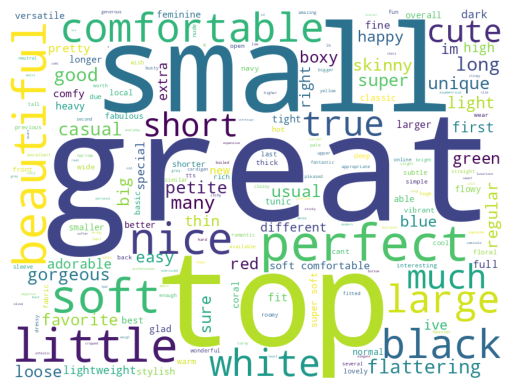

In [35]:
#visualizing the adjs

word_cloud = WordCloud(width = 800,height = 600, background_color = 'white').generate(adj_tops)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

# Analysing the sentiments of reviews

In [38]:
df1

,product_review,product_category,tokenized_review,cleaned_tokens,product_review_clean,pos_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."
...,...,...,...,...,...,...,...
3371,this is a nice everyday jacket to wear with dr...,Jackets,"[this, is, a, nice, everyday, jacket, to, wear...","[nice, everyday, jacket, wear, dresses, jeans,...",nice everyday jacket wear dresses jeans skirts...,"[(this, DT), (is, VBZ), (a, DT), (nice, JJ), (...","[nice, i, only, little, boxy, nice, nice, neut..."
3372,almost perfect this jacket doesnt have that we...,Jackets,"[almost, perfect, this, jacket, doesnt, have, ...","[almost, perfect, jacket, doesnt, weird, vegan...",almost perfect jacket doesnt weird vegan smell...,"[(almost, RB), (perfect, VB), (this, DT), (jac...","[vegan, soft, high, nice, busty, other, soft, ..."
3373,i really like the soft and very wearability of...,Jackets,"[i, really, like, the, soft, and, very, wearab...","[really, like, soft, wearability, vegan, leath...",really like soft wearability vegan leather jac...,"[(i, RB), (really, RB), (like, IN), (the, DT),...","[soft, vegan, only]"
3374,i need to remember that this brand runs small ...,Jackets,"[i, need, to, remember, that, this, brand, run...","[need, remember, brand, runs, small, ordered, ...",need remember brand runs small ordered xxsp us...,"[(i, NNS), (need, VBP), (to, TO), (remember, V...","[small, little, last, same, extra, nice, brown..."


In [39]:
sent = SentimentIntensityAnalyzer()
rev = df1.product_review_clean[0]
sent.polarity_scores(rev)

{'neg': 0.171, 'neu': 0.185, 'pos': 0.644, 'compound': 0.9464}

In [41]:
def polarity_scores(review):
  sent = SentimentIntensityAnalyzer()

  scores = sent.polarity_scores(review)
  compound = scores['compound']
  if compound > 0.05:
    return 'positive'
  elif compound < -0.5:
    return 'negative'
  else:
    return 'neutral'

polarity_scores("i hate this product, but the material is really good")

'positive'

In [42]:
df1['sentiment'] = df1.product_review_clean.apply(polarity_scores)

In [45]:
df = df1.groupby(['product_category','sentiment']).size().reset_index(name='count')
df

,product_category,sentiment,count
0,Bottoms,negative,3
1,Bottoms,neutral,5
2,Bottoms,positive,677
3,Dresses,negative,36
4,Dresses,neutral,82
5,Dresses,positive,563
6,Intimate,negative,5
7,Intimate,neutral,35
8,Intimate,positive,610
9,Jackets,negative,2


In [51]:
import plotly.express as px
fig = px.bar(df, x='product_category', y='count', color='sentiment', barmode='group')
fig.show()